In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allison.regression import LinearRegression
from allison.regression.loss import mean_squared_error
from allison.metrics import r2_score
from allison.datasets import train_test_split

In [3]:
n = 1000
x=np.linspace(2,20,n)
y=2*x + 1 + 2*np.sin(x) + np.random.randn(n)

data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,2.000000,5.900350
1,2.018018,7.790104
2,2.036036,5.691228
3,2.054054,7.436394
4,2.072072,9.030418


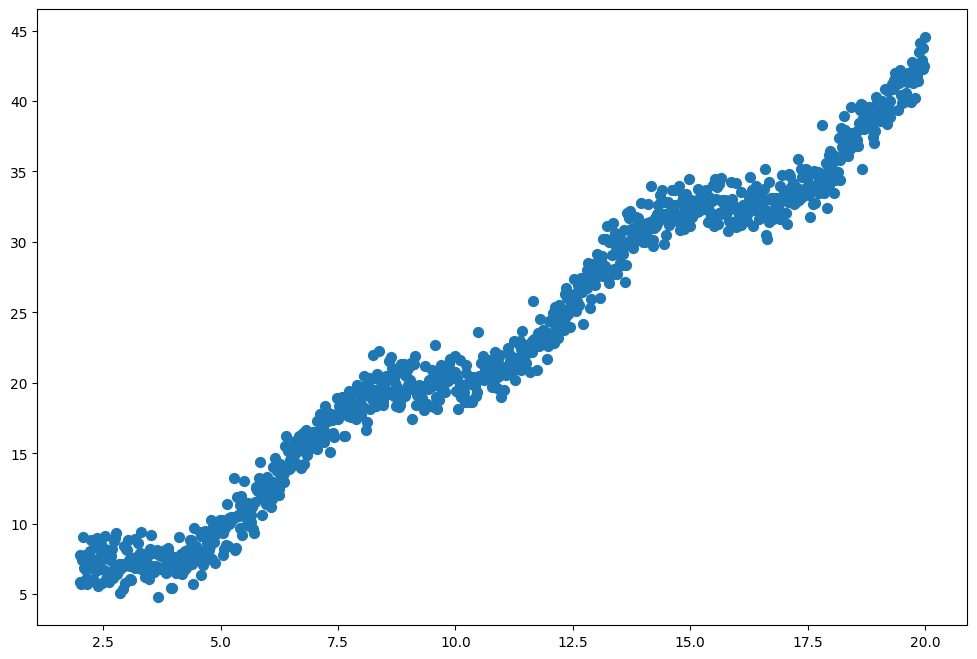

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(data['x'],data['y'],s=50)

In [5]:
X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [6]:
model=LinearRegression(loss_function=mean_squared_error,
                      metric=r2_score,
                      lr = 0.001)

model.train(X_train, y_train,n_iters=20, history_train=True)

Iter:	2	==================================================>	 mean_squared_error: 726.331% 	 r2_score: -549.90% 

Iter:	4	==================================================>	 mean_squared_error: 235.161% 	 r2_score: -110.42% 

Iter:	6	==================================================>	 mean_squared_error: 77.063% 	 r2_score: 31.05% 

Iter:	8	==================================================>	 mean_squared_error: 26.383% 	 r2_score: 76.39% 

Iter:	10	==================================================>	 mean_squared_error: 10.257% 	 r2_score: 90.82% 

Iter:	12	==================================================>	 mean_squared_error: 5.195% 	 r2_score: 95.35% 

Iter:	14	==================================================>	 mean_squared_error: 3.645% 	 r2_score: 96.74% 

Iter:	16	==================================================>	 mean_squared_error: 3.194% 	 r2_score: 97.14% 

Iter:	18	==================================================>	 mean_squared_error: 3.077% 	 r2_score: 97.25% 

Ite

In [7]:
history = model.history_train
history

{'iter': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'loss': [np.float64(726.3307815712755),
  np.float64(235.16133460363852),
  np.float64(77.06251708302506),
  np.float64(26.382837794044043),
  np.float64(10.256960494470047),
  np.float64(5.194659191920925),
  np.float64(3.6453007329570193),
  np.float64(3.1944580967606413),
  np.float64(3.0773143744952605),
  np.float64(3.0557623719838567)],
 'precision': [np.float64(-5.4989917938453),
  np.float64(-1.1041536757020687),
  np.float64(0.310467518597797),
  np.float64(0.7639342147238762),
  np.float64(0.9082237683233657),
  np.float64(0.953519734648883),
  np.float64(0.9673829332988814),
  np.float64(0.9714169391090404),
  np.float64(0.9724651062926701),
  np.float64(0.9726579472007197)],
 'params': [{'bias': array([0.]), 'weights': array([-0.85131227])},
  {'bias': array([0.11388795]), 'weights': array([0.40602092])},
  {'bias': array([0.17867506]), 'weights': array([1.12127647])},
  {'bias': array([0.21553032]), 'weights': array([1.528161

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']

    a = model.weights[0]
    b = model.bias[0]

    ax.scatter(X_train, y_train, s=50)
    if i > 0:
        ax.plot(X_train, model.predict(X_train), lw=3, c='red',label=f'Predicted y = {a:.2f}x + {b:.2f}, loss = {history["loss"][i-1]:.2f}, r2 = {history["precision"][i-1]:.2f}%')
    else:
        ax.plot(X_train, model.predict(X_train), lw=3, c='red', label=f'Predicted y = {a:.2f}x + {b:.2f}')
    ax.legend()



# Create the animation
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False,interval=1000)

plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())

In [9]:
r2_score =model.evaluate(X_test, y_test)
r2_score

np.float64(0.9713649899169856)

Text(0.5, 1.0, 'Linear Regression on Test Data(Accuracy:0.97%)')

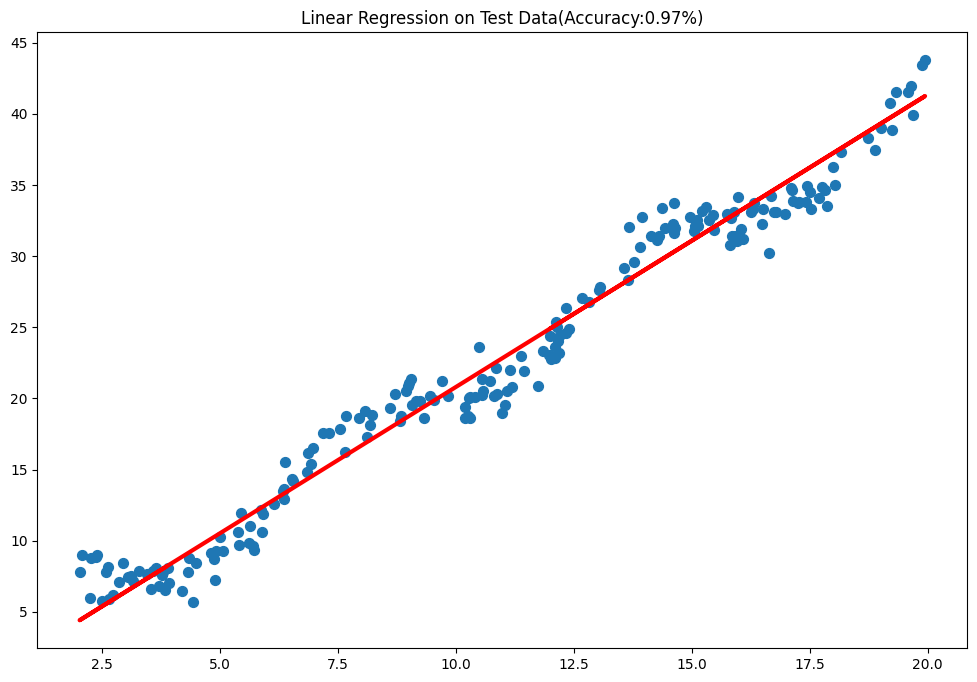

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.plot(X_test,model.predict(X_test), lw=3, c='red')
plt.title(f'Linear Regression on Test Data(Accuracy:{r2_score:.2f}%)')